In [363]:
import numpy as np
import math
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# import FIB data and calculate dose

In [364]:
data = pd.read_csv('Dose.csv')
data

,E,C,CE,Pass,D,DE,DT
0,1,0.0013,0.000013,1,5.0,0.5,2.500000e-08
1,2,0.0013,0.000013,1,5.0,0.5,5.000000e-08
2,3,0.0013,0.000013,1,5.0,0.5,1.000000e-07
3,4,0.0013,0.000013,1,5.0,0.5,2.500000e-07
4,5,0.0013,0.000013,1,5.0,0.5,5.000000e-07
5,6,0.0013,0.000013,1,5.0,0.5,1.000000e-06
6,7,0.0077,0.000077,1,8.0,0.5,1.000000e-06
7,8,0.0240,0.000240,1,10.5,0.5,1.000000e-06
8,9,0.0800,0.000800,1,14.0,2.0,1.000000e-06
9,10,0.4300,0.004300,1,30.0,2.0,1.000000e-06


In [365]:
#dwell has unit s
dwell = data['DT']

#current has unit nA
current = []
# current = unc.ufloat(data['Current'],data['CE'])   
for i in range(12):
    current.append(unc.ufloat(data['C'][i],  data['CE'][i])*1e-9)
overlap = 2
multip =  data['Pass']

#diameter has unit m
diameter = []
for i in range(12):
    diameter.append(unc.ufloat(data['D'][i],  data['DE'][i])*1e-9)
radius = []
for i in range(12):
    radius.append(diameter[i]/2)
ctoe = 6.242e18

#dose in  cm^-2
dose = []
for i in range(12):
    dose.append(current[i]*ctoe*dwell[i]*overlap*multip[i]/(math.pi*radius[i]**2)/(100)**2)


In [366]:
multip

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     2
11    10
Name: Pass, dtype: int64

In [367]:
current

[1.3000000000000001e-12+/-1.3e-14,
 1.3000000000000001e-12+/-1.3e-14,
 1.3000000000000001e-12+/-1.3e-14,
 1.3000000000000001e-12+/-1.3e-14,
 1.3000000000000001e-12+/-1.3e-14,
 1.3000000000000001e-12+/-1.3e-14,
 7.700000000000002e-12+/-7.7e-14,
 2.4e-11+/-2.4000000000000004e-13,
 8.000000000000001e-11+/-8.000000000000001e-13,
 4.3e-10+/-4.300000000000001e-12,
 7.900000000000001e-10+/-7.900000000000001e-12,
 7.900000000000001e-10+/-7.900000000000001e-12]

In [368]:
for i in range(12):
    print('Region',i,': {:.2uP} cm^-2'.format(dose[i]))

Region 0 : (2.07±0.41)×10¹² cm^-2
Region 1 : (4.13±0.83)×10¹² cm^-2
Region 2 : (8.3±1.7)×10¹² cm^-2
Region 3 : (2.07±0.41)×10¹³ cm^-2
Region 4 : (4.13±0.83)×10¹³ cm^-2
Region 5 : (8.3±1.7)×10¹³ cm^-2
Region 6 : (1.91±0.24)×10¹⁴ cm^-2
Region 7 : (3.46±0.33)×10¹⁴ cm^-2
Region 8 : (6.5±1.9)×10¹⁴ cm^-2
Region 9 : (7.6±1.0)×10¹⁴ cm^-2
Region 10 : (1.74±0.18)×10¹⁵ cm^-2
Region 11 : (8.70±0.92)×10¹⁵ cm^-2


In [369]:
for i in range(12):
    print('Region',i,': {:.2uP} nm'.format(radius[i]*1e9))

Region 0 : 2.50±0.25 nm
Region 1 : 2.50±0.25 nm
Region 2 : 2.50±0.25 nm
Region 3 : 2.50±0.25 nm
Region 4 : 2.50±0.25 nm
Region 5 : 2.50±0.25 nm
Region 6 : 4.00±0.25 nm
Region 7 : 5.25±0.25 nm
Region 8 : 7.0±1.0 nm
Region 9 : 15.0±1.0 nm
Region 10 : 19.0±1.0 nm
Region 11 : 19.0±1.0 nm


In [370]:
dose_value = unp.nominal_values(dose)
count = [1.2e4, 1.4e4, 1.6e4, 2.5e4, 2e4, 1.7e4]

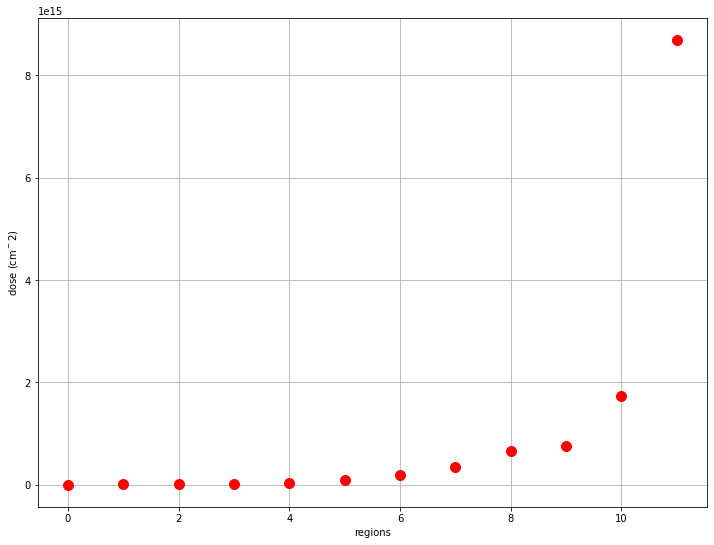

In [371]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'regions')
plt.ylabel(r'dose (cm$^-2$)')
plt.plot(dose_value,'.r', markersize = 20)

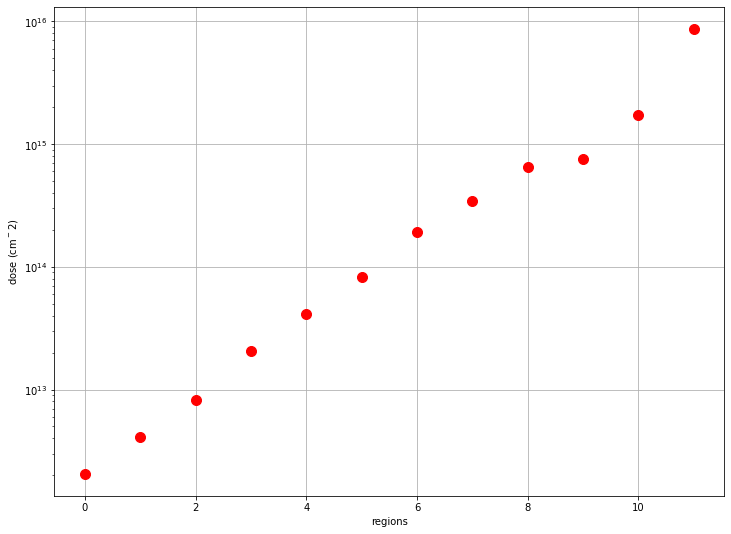

In [372]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'regions')
plt.ylabel(r'dose (cm$^-2$)')
plt.plot(dose_value,'.r', markersize = 20)
plt.yscale("log")

# import PL data and plot

In [373]:
el297 = pd.read_csv('el297.csv')
el298 = pd.read_csv('el298.csv')
calib = unc.ufloat(1.31e6, 8.97e4)
# calib = 1.31e6

In [374]:
el297

,region,PL,PLE
0,918,1.0000,1.000000
1,915,1.0000,1.000000
2,912,20096.0000,7337.661753
3,99,67842.0000,23221.059840
4,96,95446.0000,29799.049150
5,93,190525.0000,22594.302380
6,318,466442.8571,38532.880210
7,315,634440.0000,20712.146190
8,312,619125.0000,29338.527000
9,39,515640.0000,43988.782660


In [375]:
el297[2:12]

,region,PL,PLE
2,912,20096.0000,7337.661753
3,99,67842.0000,23221.059840
4,96,95446.0000,29799.049150
5,93,190525.0000,22594.302380
6,318,466442.8571,38532.880210
7,315,634440.0000,20712.146190
8,312,619125.0000,29338.527000
9,39,515640.0000,43988.782660
10,36,535900.0000,59236.897290
11,33,714857.1429,72805.078970


In [376]:
el298

,region,PL,PLE
0,918,1.0,1.0
1,915,1.0,1.0
2,912,1.0,1.0
3,99,1.0,1.0
4,96,1.0,1.0
5,93,1.0,1.0
6,318,2830000.0,163000.0
7,315,3060000.0,146000.0
8,312,3060000.0,87300.0
9,39,2920000.0,109000.0


In [377]:
el298[6:12]

,region,PL,PLE
6,318,2830000.0,163000.0
7,315,3060000.0,146000.0
8,312,3060000.0,87300.0
9,39,2920000.0,109000.0
10,36,3120000.0,71900.0
11,33,3910000.0,97200.0


In [378]:
log_pl97

array([-6.117271295655764+/-0.4353114057834351,
       -6.117271295655764+/-0.4353114057834351,
       -1.814161673598662+/-0.16133840931893695,
       -1.2857726531028533+/-0.15159627203052572,
       -1.1375135631809596+/-0.13881312344488453,
       -0.837319325357068+/-0.05947156245463666,
       -0.44847284878700067+/-0.04659924174888813,
       -0.314880739203028+/-0.032944533302359115,
       -0.3254929546652518+/-0.03616430917893349,
       -0.40492469592423624+/-0.04750759307659471,
       -0.38818753861215244+/-0.056470087315101176,
       -0.26305203462260196+/-0.05329825586063765], dtype=object)

In [379]:
log_dose

array([12.31520723093396+/-0.0869674022273042,
       12.616237226597942+/-0.0869674022273042,
       12.917267222261923+/-0.0869674022273042,
       13.31520723093396+/-0.08696740222730422,
       13.616237226597942+/-0.08696740222730422,
       13.917267222261923+/-0.08696740222730422,
       14.281574629815719+/-0.054460250968092594,
       14.539096522198854+/-0.041588758834767835,
       14.812097794262591+/-0.12416011595975189,
       14.880489824767386+/-0.05806856297053669,
       15.240353772347925+/-0.04592103514729194,
       15.939323776683944+/-0.04592103514729195], dtype=object)

In [380]:
pl97 = []
for i in range(12):
    pl97.append(unc.ufloat(el297['PL'][i], el297['PLE'][i])/calib)
pl97_value = unp.nominal_values(pl97)
pl97_error = unp.std_devs(pl97)
log_pl97 = []
# for i in range(2,12):
#     log_pl97.append(unp.log10(pl97[i]))
log_pl97 = unp.log10(pl97)
log_pl97_value = unp.nominal_values(log_pl97)
log_pl97_error = unp.std_devs(log_pl97)

In [381]:
pl98 = []
for i in range(12):
    pl98.append(unc.ufloat(el298['PL'][i], el298['PLE'][i])/calib)
pl98_value = unp.nominal_values(pl98)
pl98_error = unp.std_devs(pl98)
log_pl98 = []
# for i in range(6,12):
#     log_pl98.append(unp.log10(pl98[i]))
log_pl98 = unp.log10(pl98)
log_pl98_value = unp.nominal_values(log_pl98)
log_pl98_error = unp.std_devs(log_pl98)

In [382]:
log_dose = unp.log10(dose)
log_dose_value = unp.nominal_values(log_dose)
log_dose_error = unp.std_devs(log_dose)

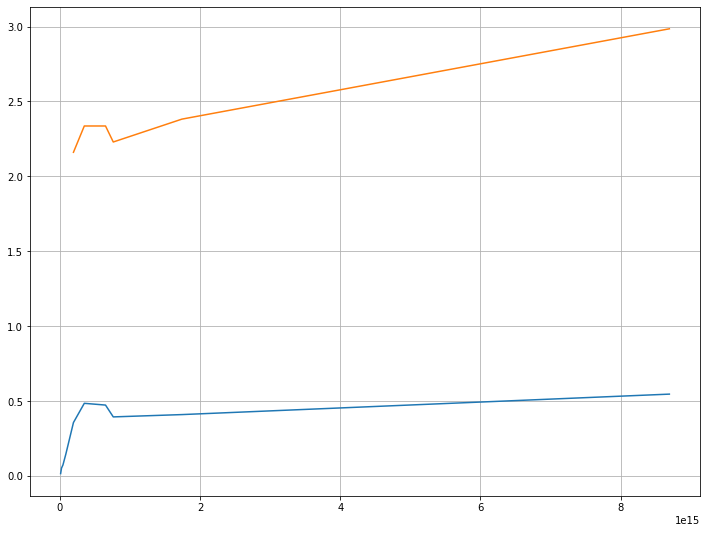

In [383]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(dose_value[2:12],pl97_value[2:12])
plt.plot(dose_value[6:12],pl98_value[6:12])
plt.show()

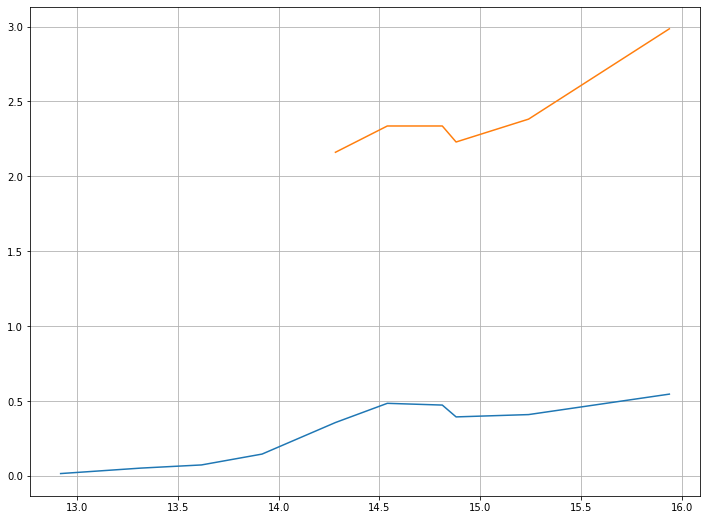

In [384]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(log_dose_value[2:12],pl97_value[2:12])
plt.plot(log_dose_value[6:12],pl98_value[6:12])
plt.show()

<ErrorbarContainer object of 3 artists>

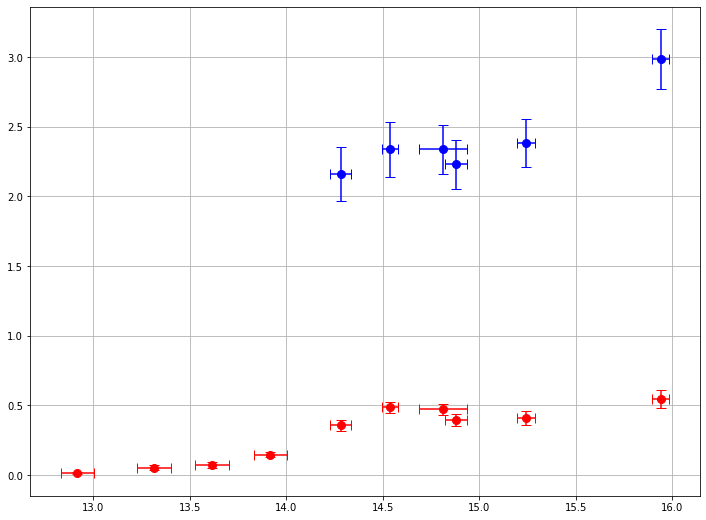

In [385]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[2:12], pl97_value[2:12], xerr=log_dose_error[2:12], yerr=pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], pl98_value[6:12], xerr=log_dose_error[6:12], yerr=pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

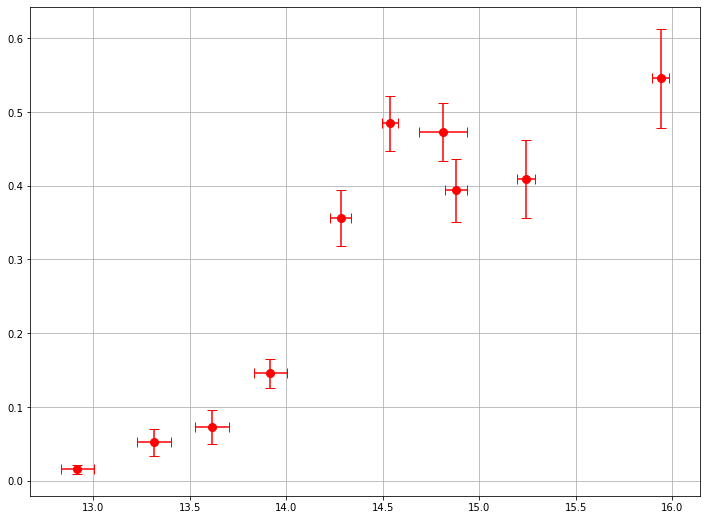

In [386]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[2:12], pl97_value[2:12], xerr=log_dose_error[2:12], yerr=pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)


<ErrorbarContainer object of 3 artists>

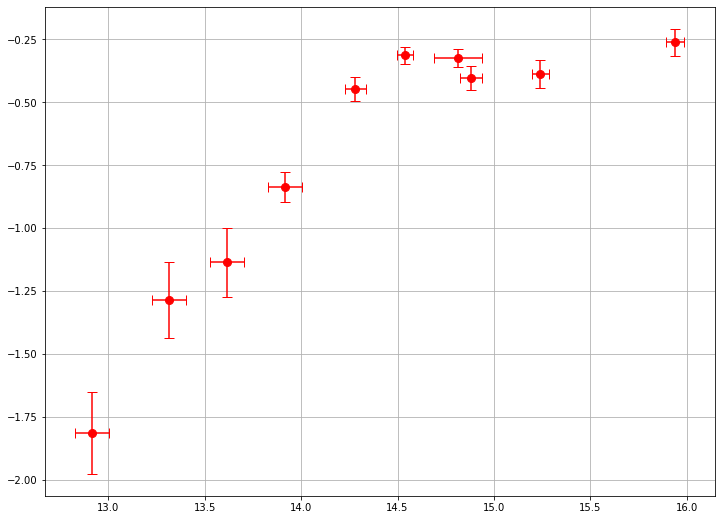

In [387]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

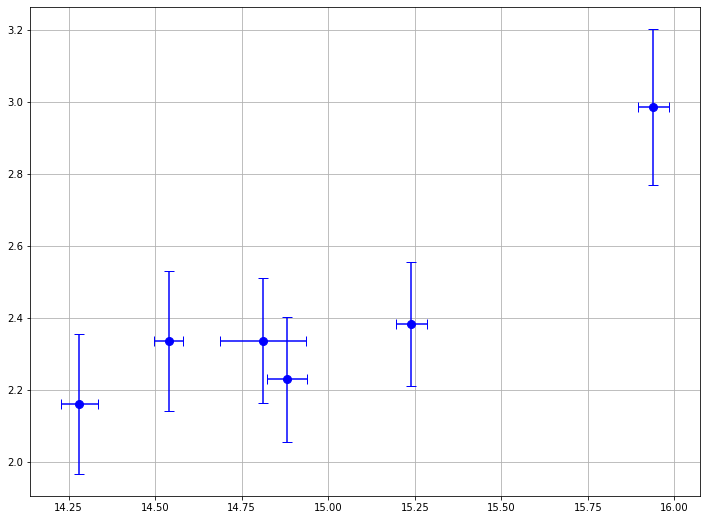

In [388]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[6:12], pl98_value[6:12], xerr=log_dose_error[6:12], yerr=pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

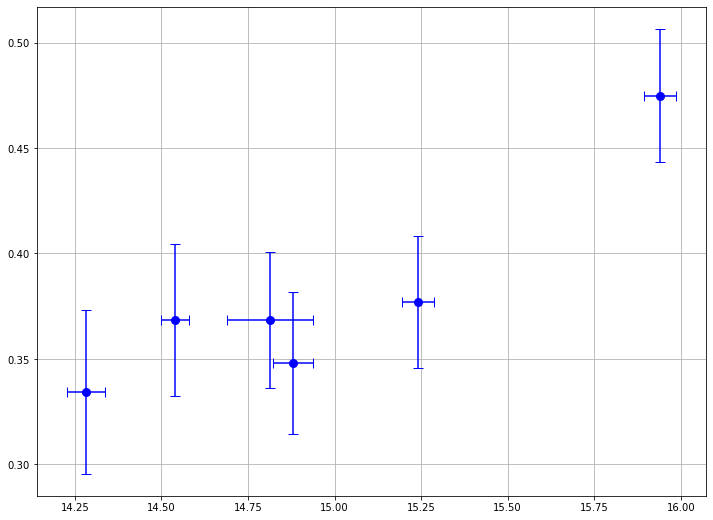

In [389]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

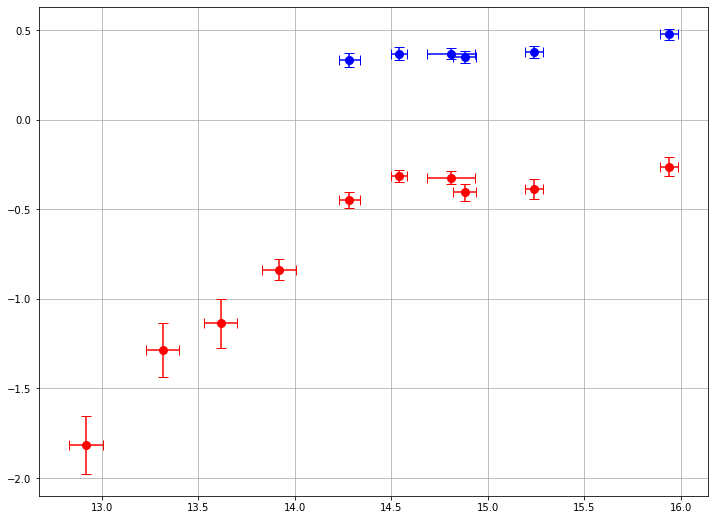

In [412]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
# plt.plot(log_dose_value[2:12], log_pl97_value[2:12],  color="r")
# plt.plot(log_dose_value[6:12], log_pl98_value[6:12],  color="b")
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

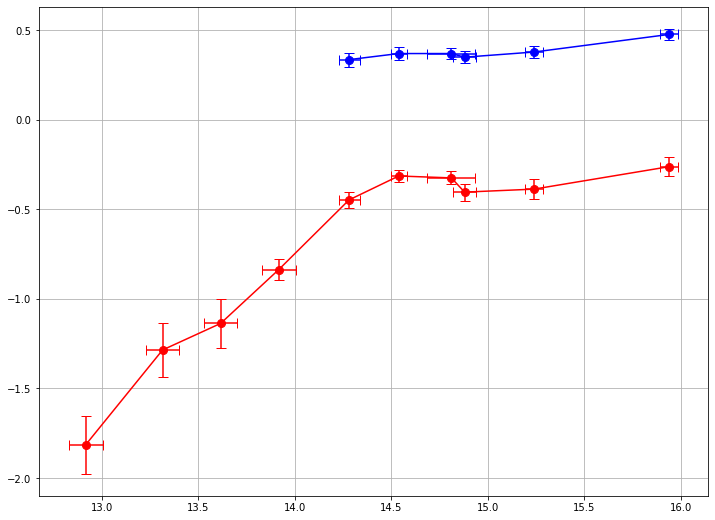

In [413]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(log_dose_value[2:12], log_pl97_value[2:12],  color="r")
plt.plot(log_dose_value[6:12], log_pl98_value[6:12],  color="b")
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

# yield calculation

In [399]:
y97 = []
for i in range(12):
    y97.append(pl97[i]/dose[i])
y97_value = unp.nominal_values(y97)
y97_error = unp.std_devs(y97)

In [400]:
y98 = []
for i in range(12):
    y98.append(pl98[i]/dose[i])
y98_value = unp.nominal_values(y98)
y98_error = unp.std_devs(y98)

In [406]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]

<ErrorbarContainer object of 3 artists>

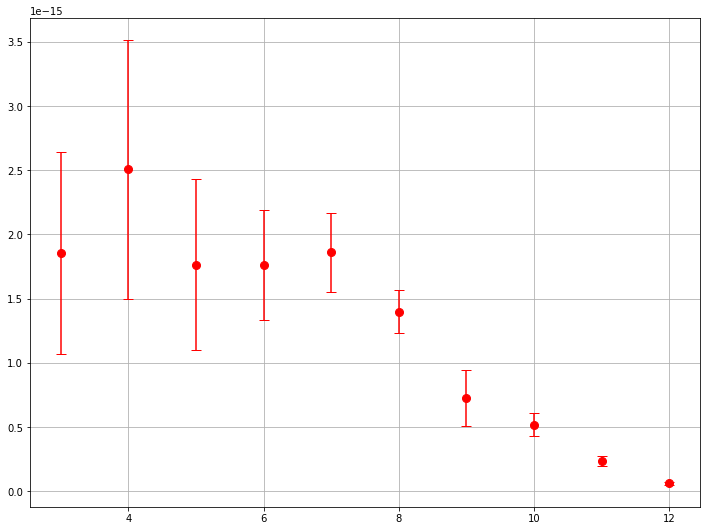

In [407]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

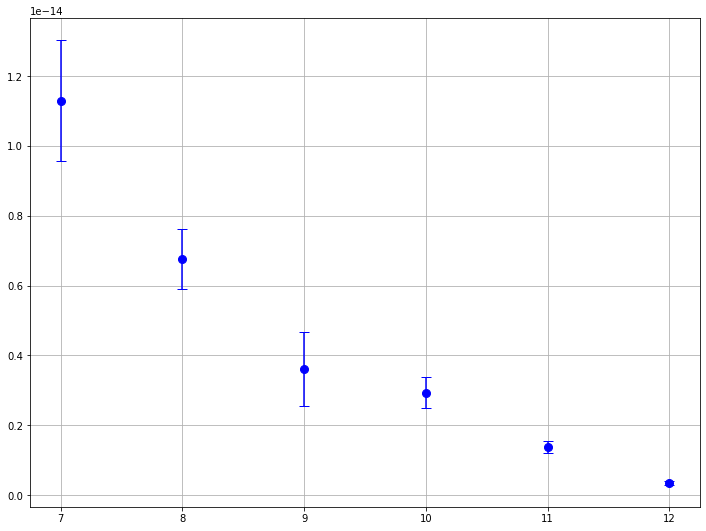

In [408]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

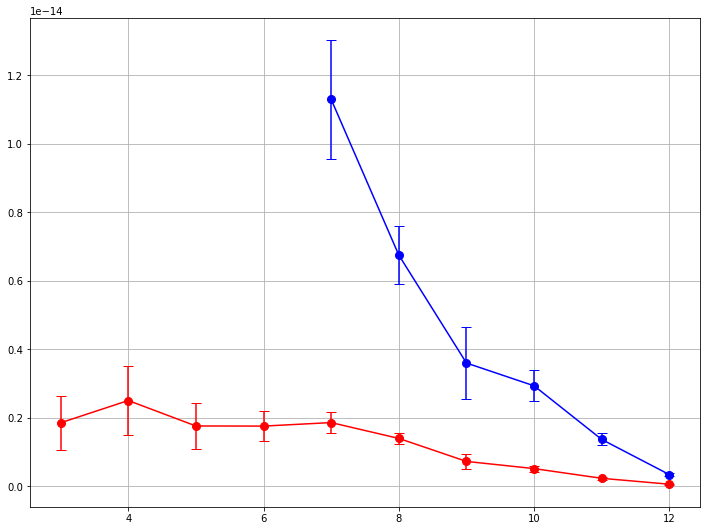

In [410]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(x[2:12],y97_value[2:12],  color="r")
plt.plot(x[6:12],y98_value[6:12],  color="b")
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

# final plots

<ErrorbarContainer object of 3 artists>

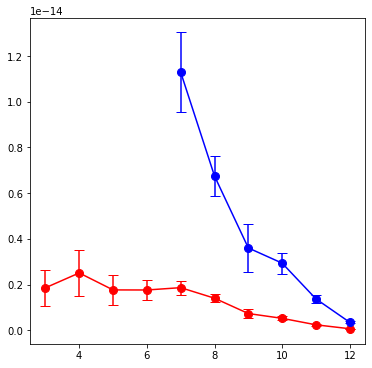

In [425]:
myfig = plt.figure(figsize=(6,6))
plt.plot(x[2:12],y97_value[2:12],  color="r")
plt.plot(x[6:12],y98_value[6:12],  color="b")
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

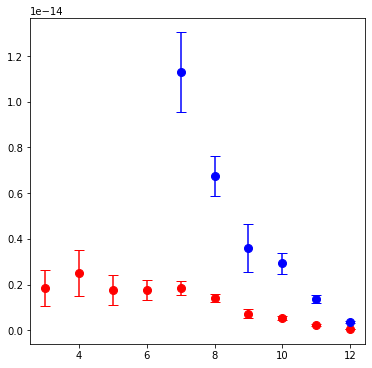

In [426]:
myfig = plt.figure(figsize=(6,6))
# plt.plot(x[2:12],y97_value[2:12],  color="r")
# plt.plot(x[6:12],y98_value[6:12],  color="b")
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)


<ErrorbarContainer object of 3 artists>

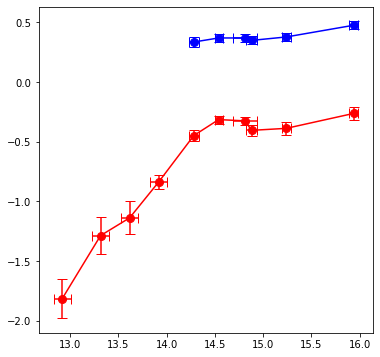

In [427]:
myfig = plt.figure(figsize=(6,6))
plt.plot(log_dose_value[2:12], log_pl97_value[2:12],  color="r")
plt.plot(log_dose_value[6:12], log_pl98_value[6:12],  color="b")
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

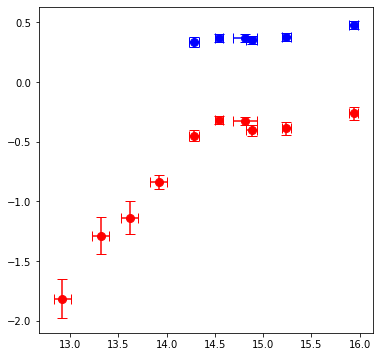

In [428]:
myfig = plt.figure(figsize=(6,6))
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)